## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Customers.csv

In [2]:
# Load the Customers dataset
customers_df = pd.read_csv("Customers.csv")

# Display the first few rows of the dataset
customers_df.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
# Display dataset information
customers_df.info()

# Check for duplicate records
print(f"Duplicate records: {customers_df.duplicated().sum()}")

# Check for missing values
print(customers_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Duplicate records: 0
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [4]:
# Convert 'SignupDate' column to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Verify the data types after conversion
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


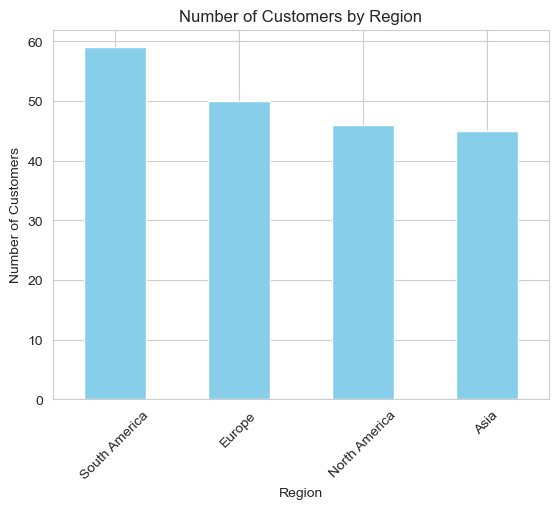

In [5]:
# Count of customers per region
region_counts = customers_df['Region'].value_counts()
print(region_counts)

# Plot the counts
region_counts.plot(kind='bar', color='skyblue', title='Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

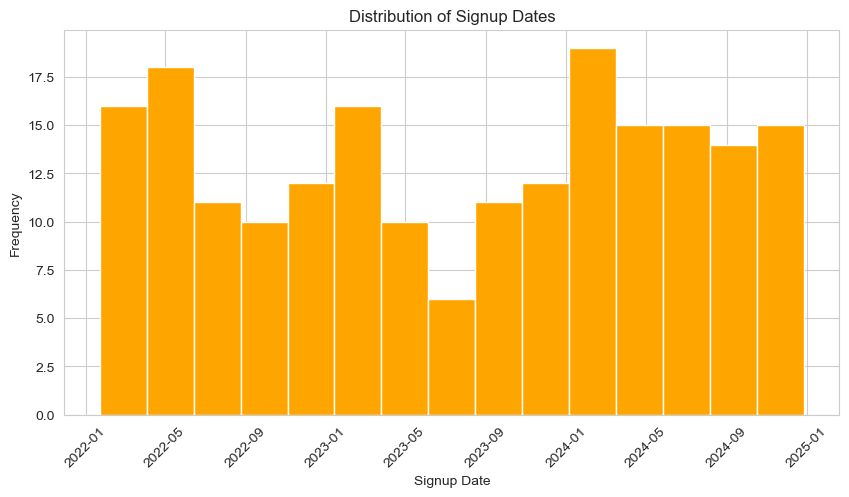

In [6]:
# Plot the distribution of signup dates
plt.figure(figsize=(10, 5))
customers_df['SignupDate'].hist(color='orange', bins=15)
plt.title('Distribution of Signup Dates')
plt.xlabel('Signup Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


count                     200
unique                    179
top       2024-11-11 00:00:00
freq                        3
first     2022-01-22 00:00:00
last      2024-12-28 00:00:00
Name: SignupDate, dtype: object
2022    64
2023    57
2024    79
Name: SignupYear, dtype: int64


C:\Users\hardi\AppData\Local\Temp\ipykernel_14460\2255894876.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(customers_df['SignupDate'].describe())


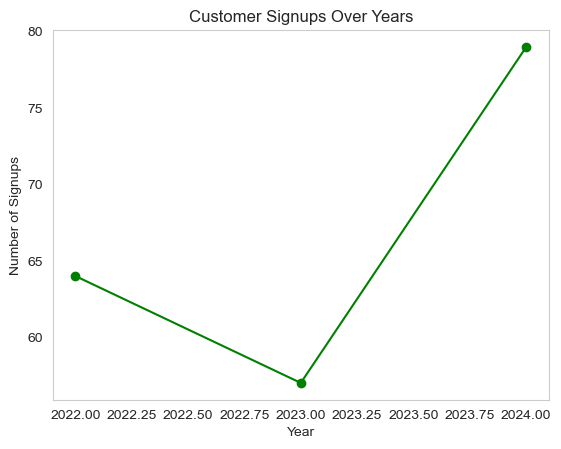

In [7]:
# Display summary statistics of Signup Dates
print(customers_df['SignupDate'].describe())

# Additional insights: Number of customers per year
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
yearly_customers = customers_df['SignupYear'].value_counts().sort_index()
print(yearly_customers)

# Plot the trend of customer signups by year
yearly_customers.plot(kind='line', marker='o', color='green', title='Customer Signups Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()


# Products.csv

In [8]:
# Load the Products dataset
products_df = pd.read_csv("Products.csv")

# Display the first few rows of the dataset
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [9]:
# Display dataset information
products_df.info()

# Check for duplicate records
print(f"Duplicate records: {products_df.duplicated().sum()}")

# Check for missing values
print(products_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Duplicate records: 0
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [10]:
# Display summary statistics for numerical columns
products_df.describe()


,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


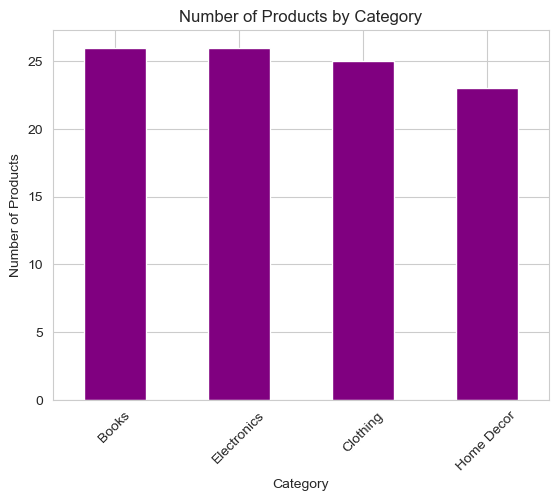

In [11]:
# Count of products per category
category_counts = products_df['Category'].value_counts()
print(category_counts)

# Plot the counts of products per category
category_counts.plot(kind='bar', color='purple', title='Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


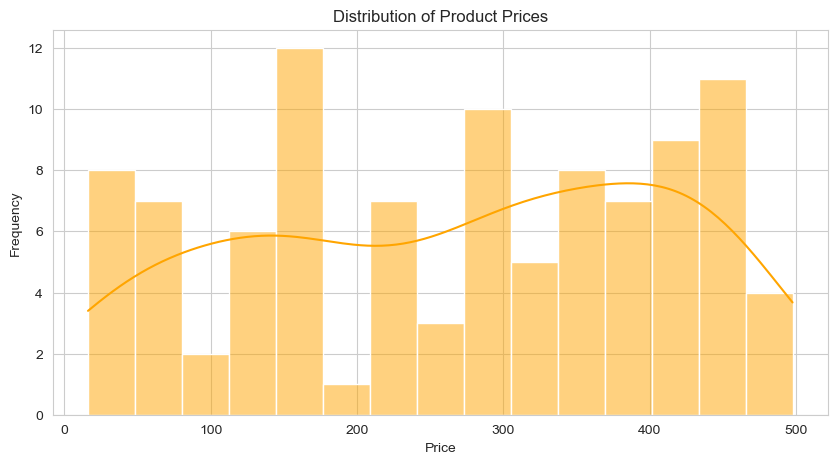

In [12]:
# Plot the distribution of product prices
plt.figure(figsize=(10, 5))
sns.histplot(products_df['Price'], kde=True, color='orange', bins=15)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86


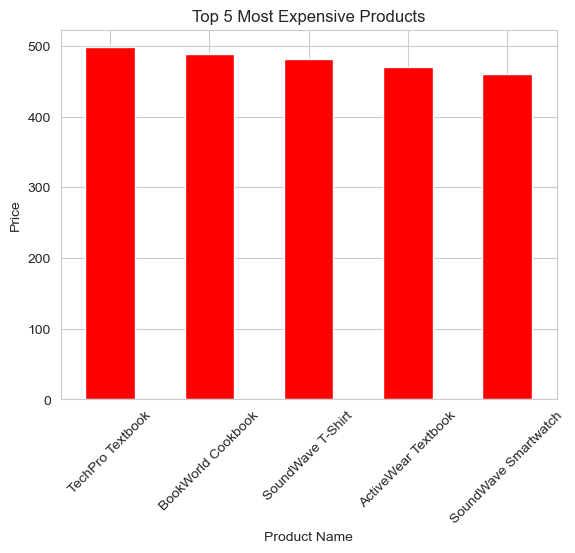

In [13]:
# Top 5 most expensive products
top_expensive = products_df.nlargest(5, 'Price')
print(top_expensive)

# Plot the prices of the top 5 most expensive products
top_expensive.plot(x='ProductName', y='Price', kind='bar', color='red', legend=False)
plt.title('Top 5 Most Expensive Products')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


# Transactions.csv

In [14]:
# Load the Transactions dataset
transactions_df = pd.read_csv("Transactions.csv", parse_dates=['TransactionDate'])

# Display the first few rows of the dataset
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [15]:
# Display dataset information
transactions_df.info()

# Check for duplicate records
print(f"Duplicate records: {transactions_df.duplicated().sum()}")

# Check for missing values
print(transactions_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
Duplicate records: 0
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [16]:
# Display summary statistics for numerical columns
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


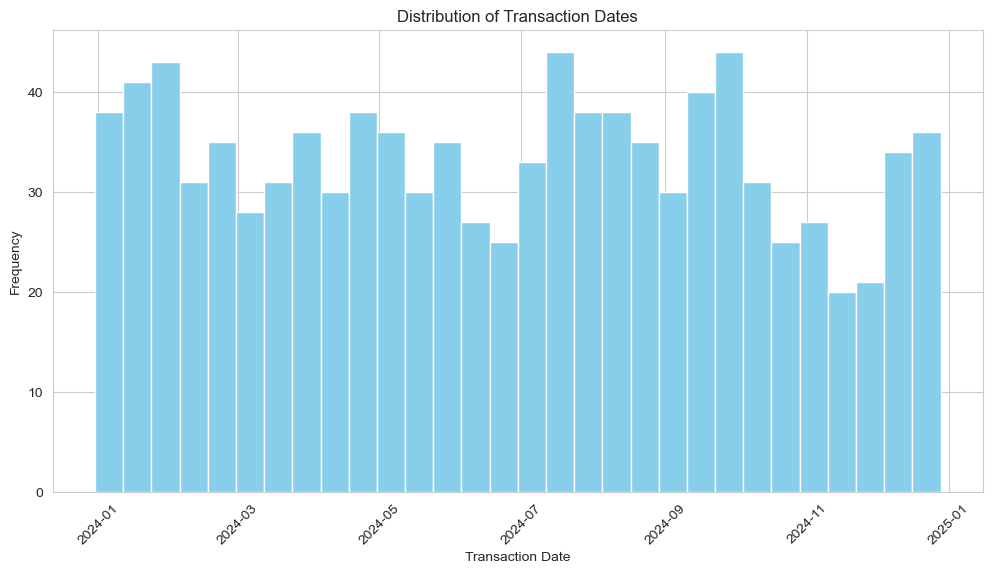

In [17]:
# Plot the distribution of transaction dates
plt.figure(figsize=(12, 6))
transactions_df['TransactionDate'].hist(bins=30, color='skyblue')
plt.title('Distribution of Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: CustomerID, dtype: int64


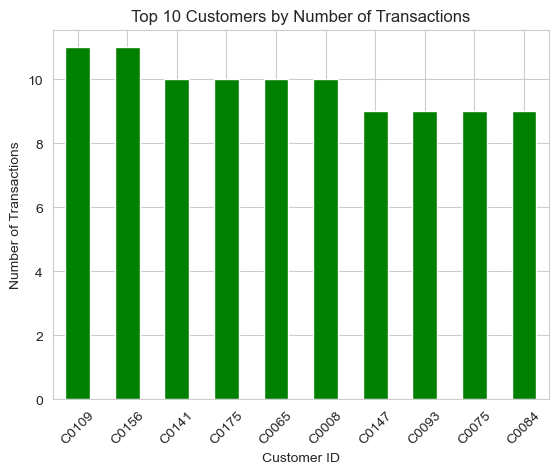

In [18]:
# Count transactions per customer
customer_transaction_counts = transactions_df['CustomerID'].value_counts().head(10)
print(customer_transaction_counts)

# Plot the top 10 customers by number of transactions
customer_transaction_counts.plot(kind='bar', color='green', title='Top 10 Customers by Number of Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


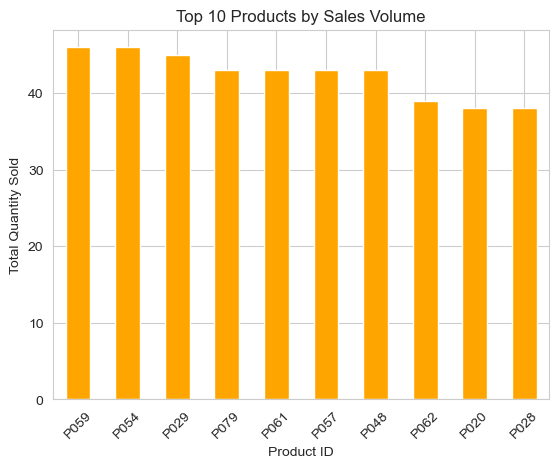

In [19]:
# Calculate total quantity sold per product
product_sales = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(product_sales)

# Plot the top 10 products by sales volume
product_sales.plot(kind='bar', color='orange', title='Top 10 Products by Sales Volume')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


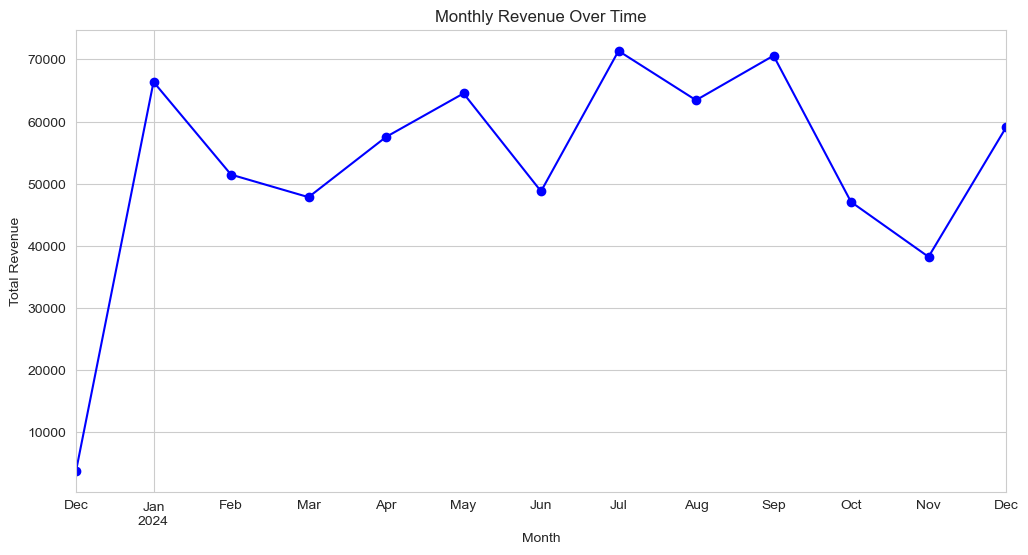

In [20]:
# Set the TransactionDate as the index
transactions_df.set_index('TransactionDate', inplace=True)

# Resample to get monthly revenue
monthly_revenue = transactions_df['TotalValue'].resample('M').sum()

# Plot the monthly revenue
plt.figure(figsize=(12, 6))
monthly_revenue.plot(color='blue', marker='o', linestyle='-')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()
